# Subreddit analysis

In [1]:
import pandas as pd

from scraping import get_all_comments_from_subreddit

## Getting the data

In [2]:
subreddit_url = "/r/askreddit" # https://reddit.com/r/askreddit
comments = get_all_comments_from_subreddit(subreddit_url)

Getting posts from /r/askreddit...
Getting comments from https://reddit.com/r/AskReddit/comments/c0qaj7/have_you_ever_quit_a_job_without_another_lined_up/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0ocp5/it_people_of_reddit_what_is_your_goto_generic/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0matc/which_two_and_two_did_you_just_recently_put/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0kwdw/teachers_of_reddit_what_is_the_weirdest_excuse/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0kyo0/americans_whove_visited_european_countries_what/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0liuk/liberals_of_reddit_what_is_your_most_conservative/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0n5pd/its_a_post_apocalyptic_world_however_reddit_is/.json...
Getting comments from https://reddit.com/r/AskReddit/comments/c0ovb8/serious_doctor_of_

## Pre-pre-process data

Getting that sweet dataframe tho

In [3]:
df = pd.DataFrame(comments)
df.head()

,content,score
0,Worked a call center job after one week of tra...,5796
1,"Yep.\n\nMy mental health is still not good, an...",7585
2,Quit my job at a call centre without anything ...,11016
3,Hell yes. I worked in a retail store that was...,15330
4,Left my job of 15 years with nothing lined up ...,6431


Sorting that shit by scoring (higher better, faster stronger?)

In [4]:
df.sort_values(by=['score'], inplace=True, ascending=False)
df.head()

,content,score
99,Valve released Steam. \n\nTook me entirely too...,34877
574,A sugar glider. Kept hearing a high pitched sq...,27255
76,"In Spanish, hats are called ""sombrero"" because...",26751
1051,Fyre Festival VIP suites,24645
78,I race cars in an amateur league. There is a b...,22941


Let's remove all urls from the text with a `re.sub` regex I found in the internet.

In [5]:
import re

hola = "https://reddit.com/ejemplo hola me llamo Javier"
print(re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', hola))
print(hola)

df['content'] = df['content'].apply(lambda comment: re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', comment))
df.head()

 hola me llamo Javier
https://reddit.com/ejemplo hola me llamo Javier


,content,score
99,Valve released Steam. \n\nTook me entirely too...,34877
574,A sugar glider. Kept hearing a high pitched sq...,27255
76,"In Spanish, hats are called ""sombrero"" because...",26751
1051,Fyre Festival VIP suites,24645
78,I race cars in an amateur league. There is a b...,22941


Remove all punctuation with this expression I found in the internet.

In [6]:
df['content'] = df['content'].str.replace(r'[^\w\s]','')
df.head()

,content,score
99,Valve released Steam \n\nTook me entirely too ...,34877
574,A sugar glider Kept hearing a high pitched squ...,27255
76,In Spanish hats are called sombrero because th...,26751
1051,Fyre Festival VIP suites,24645
78,I race cars in an amateur league There is a bl...,22941


## Pre-processing stats!

Let's do some Natural Language Processing with `NLTK`!

In [24]:
import nltk
#nltk.download()

['Hola', 'me', 'llamo', ',', 'Javier']

Okay, let's turn all text into a list of words! We are going to use nltk instead of our own homegrown solution! They know better!

In [8]:
df['content'] = df['content'].apply(lambda comment: nltk.word_tokenize(comment))
df.head()

,content,score
99,"[Valve, released, Steam, Took, me, entirely, t...",34877
574,"[A, sugar, glider, Kept, hearing, a, high, pit...",27255
76,"[In, Spanish, hats, are, called, sombrero, bec...",26751
1051,"[Fyre, Festival, VIP, suites]",24645
78,"[I, race, cars, in, an, amateur, league, There...",22941


The word count of each comment could be useful

In [9]:
df['word_count'] = df['content'].apply(len)
df.head()

,content,score,word_count
99,"[Valve, released, Steam, Took, me, entirely, t...",34877,12
574,"[A, sugar, glider, Kept, hearing, a, high, pit...",27255,29
76,"[In, Spanish, hats, are, called, sombrero, bec...",26751,11
1051,"[Fyre, Festival, VIP, suites]",24645,4
78,"[I, race, cars, in, an, amateur, league, There...",22941,39


Then, the lenght of the characters could be of use too

In [10]:
df['char_len'] = df['content'].apply(lambda comment: sum(len(word) for word in comment))
df.head()

,content,score,word_count,char_len
99,"[Valve, released, Steam, Took, me, entirely, t...",34877,12,54
574,"[A, sugar, glider, Kept, hearing, a, high, pit...",27255,29,119
76,"[In, Spanish, hats, are, called, sombrero, bec...",26751,11,56
1051,"[Fyre, Festival, VIP, suites]",24645,4,21
78,"[I, race, cars, in, an, amateur, league, There...",22941,39,159


How many characters long is a word in average?

In [11]:
def avg_word(comment):
    return (sum(len(word) for word in comment)/len(comment))
df['avg_word'] = df['content'].apply(avg_word)
df.head()

,content,score,word_count,char_len,avg_word
99,"[Valve, released, Steam, Took, me, entirely, t...",34877,12,54,4.500000
574,"[A, sugar, glider, Kept, hearing, a, high, pit...",27255,29,119,4.103448
76,"[In, Spanish, hats, are, called, sombrero, bec...",26751,11,56,5.090909
1051,"[Fyre, Festival, VIP, suites]",24645,4,21,5.250000
78,"[I, race, cars, in, an, amateur, league, There...",22941,39,159,4.076923


Let's get how many stopwords are there in the comments

In [26]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords'] = df['content'].apply(lambda comment: len([word for word in comment if word in stop]))
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
99,"[valve, released, steam, took, entirely, long,...",34877,12,54,4.500000,0,0
574,"[sugar, glider, kept, hearing, high, pitched, ...",27255,29,119,4.103448,0,1
76,"[spanish, hat, called, sombrero, make, sombra,...",26751,11,56,5.090909,0,0
1051,"[fyre, festival, vip, suite]",24645,4,21,5.250000,0,1
78,"[race, car, amateur, league, blue, 240sx, name...",22941,39,159,4.076923,0,3


How many upper words?

In [13]:
df['upper_words'] = df['content'].apply(lambda comment: len([word for word in comment if word.isupper()]))
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
99,"[Valve, released, Steam, Took, me, entirely, t...",34877,12,54,4.500000,4,0
574,"[A, sugar, glider, Kept, hearing, a, high, pit...",27255,29,119,4.103448,12,1
76,"[In, Spanish, hats, are, called, sombrero, bec...",26751,11,56,5.090909,3,0
1051,"[Fyre, Festival, VIP, suites]",24645,4,21,5.250000,0,1
78,"[I, race, cars, in, an, amateur, league, There...",22941,39,159,4.076923,17,3


## Actually pre-processing

Let's turn all words into lowercase

In [14]:
df['content'] = df['content'].apply(lambda comment: [word.lower() for word in comment])
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
99,"[valve, released, steam, took, me, entirely, t...",34877,12,54,4.500000,4,0
574,"[a, sugar, glider, kept, hearing, a, high, pit...",27255,29,119,4.103448,12,1
76,"[in, spanish, hats, are, called, sombrero, bec...",26751,11,56,5.090909,3,0
1051,"[fyre, festival, vip, suites]",24645,4,21,5.250000,0,1
78,"[i, race, cars, in, an, amateur, league, there...",22941,39,159,4.076923,17,3


We don't want none of those pesky stopwords, do we?

In [15]:
df['content'] = df['content'].apply(lambda comment: [word for word in comment if word not in stop])
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
99,"[valve, released, steam, took, entirely, long,...",34877,12,54,4.500000,4,0
574,"[sugar, glider, kept, hearing, high, pitched, ...",27255,29,119,4.103448,12,1
76,"[spanish, hats, called, sombrero, make, sombra...",26751,11,56,5.090909,3,0
1051,"[fyre, festival, vip, suites]",24645,4,21,5.250000,0,1
78,"[race, cars, amateur, league, blue, 240sx, nam...",22941,39,159,4.076923,17,3


Most common words don't really help in our studies. Let's remove those!

In [16]:
freq = pd.Series(' '.join(" ".join(comment) for comment in df['content']).split(" ")).value_counts()[:10]
freq

im        321
like      292
would     288
one       286
time      225
school    215
get       211
got       201
didnt     191
back      184
dtype: int64

In [17]:
freq_list = list(freq.index)
df['content'] = df['content'].apply(lambda comment: [word for word in comment if word not in freq_list])
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
99,"[valve, released, steam, took, entirely, long,...",34877,12,54,4.500000,4,0
574,"[sugar, glider, kept, hearing, high, pitched, ...",27255,29,119,4.103448,12,1
76,"[spanish, hats, called, sombrero, make, sombra...",26751,11,56,5.090909,3,0
1051,"[fyre, festival, vip, suites]",24645,4,21,5.250000,0,1
78,"[race, cars, amateur, league, blue, 240sx, nam...",22941,39,159,4.076923,17,3


So the same happens with the least frequent ones. Let's remove those too.

In [18]:
less_freq = pd.Series(' '.join(" ".join(comment) for comment in df['content']).split(" ")).value_counts()[-10:]
less_freq

ａｃｔｉｖａｔｅｄ       1
scratched       1
alternate       1
expunging       1
notified        1
sensitivity     1
phrasing        1
transformed     1
continuously    1
samuel          1
dtype: int64

In [19]:
less_freq_list = list(less_freq.index)
df['content'] = df['content'].apply(lambda comment: [word for word in comment if word not in less_freq_list])
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
99,"[valve, released, steam, took, entirely, long,...",34877,12,54,4.500000,4,0
574,"[sugar, glider, kept, hearing, high, pitched, ...",27255,29,119,4.103448,12,1
76,"[spanish, hats, called, sombrero, make, sombra...",26751,11,56,5.090909,3,0
1051,"[fyre, festival, vip, suites]",24645,4,21,5.250000,0,1
78,"[race, cars, amateur, league, blue, 240sx, nam...",22941,39,159,4.076923,17,3


Now that we are with less words, let's correct those we have. In the internet, half the people write like shit believe or not!

This usually takes a while, don't panic.

In [20]:
#from textblob import TextBlob
#print(TextBlob(" ".join("Hey what are you doing?".split())).correct())
#df['content'] = df['content'].apply(lambda comment: TextBlob(" ".join(comment)).correct())
#df.head()

Now, we will turn all the words into their lemmas.
See, you can have `tree` and `trees` or `go` and `going`, and this will turn it into `tree` and `go`.

This should take a while.

In [21]:
from textblob import Word
df['content'] = df['content'].apply(lambda comment: [Word(word).lemmatize() for word in comment])
df.head()

,content,score,word_count,char_len,avg_word,stopwords,upper_words
99,"[valve, released, steam, took, entirely, long,...",34877,12,54,4.500000,4,0
574,"[sugar, glider, kept, hearing, high, pitched, ...",27255,29,119,4.103448,12,1
76,"[spanish, hat, called, sombrero, make, sombra,...",26751,11,56,5.090909,3,0
1051,"[fyre, festival, vip, suite]",24645,4,21,5.250000,0,1
78,"[race, car, amateur, league, blue, 240sx, name...",22941,39,159,4.076923,17,3


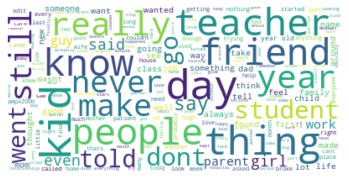

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, background_color="white").generate(" ".join(" ".join(comment) for comment in df['content']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()